# Analysis of Excerpt Lengths

This notebook will analyze how many sentences are in each excerpt, and transform the labelled excerpts into a dataset of labelled sentences. 

## Import Data and Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import compress
from classifiers.binary_classifier import *
from nltk import sent_tokenize

In [2]:
data_df = load_data()

In [3]:
data_df.head()

,ACCOUNT,Excerpts,StoryID,file
0,1,"Are guns the problem, video\ngames, the increa...",NI2599,data/Isla Vista - All Excerpts - 1_2_2019.xlsx
1,0,"May 23, 2014, in Isla Vista, California. 22-ye...",NI2599,data/Isla Vista - All Excerpts - 1_2_2019.xlsx
2,0,A 22-year-old student last Friday killed six p...,NI2951,data/Isla Vista - All Excerpts - 1_2_2019.xlsx
3,1,A 22-year-old student last Friday killed six p...,NI2951,data/Isla Vista - All Excerpts - 1_2_2019.xlsx
4,1,Elliot Rodger was not a typical man � few of u...,NI2951,data/Isla Vista - All Excerpts - 1_2_2019.xlsx


## Process Data Into Sentences

In [110]:
sentences = []
account_labels = []
original_file = []
docid = []
excerpt_lengths = []
excerpt_len_sent_df = []

for index, row in data_df.iterrows():
    excerpt = row['Excerpts']
    excerpt_sentences = sent_tokenize(excerpt)
    labels = [row['ACCOUNT']]*len(excerpt_sentences) # add same label for each sentence
    StoryIDs = [row['StoryID']]*len(excerpt_sentences) # add same label for each sentence
    files = [row['file']]*len(excerpt_sentences) # add same label for each sentence
    excerpt_lengths.append(len(excerpt_sentences))
    excerpt_len_sent_df.extend([len(excerpt_sentences)]*len(excerpt_sentences))
    
    sentences.extend(excerpt_sentences)
    
    account_labels.extend(labels)
    original_file.extend(files)
    docid.extend(StoryIDs)
    if index%1000 ==0:
        print("Index: "+str(index))
        
sentences_dict = {'file':original_file, 'StoryID': docid, 
                  'Sentences': sentences, 'ACCOUNT': account_labels,
                 'excerpt_length':excerpt_len_sent_df}

sentences_df = pd.DataFrame(sentences_dict)

Index: 0
Index: 1000
Index: 2000
Index: 3000
Index: 4000
Index: 5000
Index: 6000
Index: 7000
Index: 8000
Index: 9000
Index: 10000
Index: 11000
Index: 12000
Index: 13000
Index: 14000
Index: 15000
Index: 16000
Index: 17000
Index: 18000
Index: 19000
Index: 20000
Index: 21000


In [111]:
# save the sentences data frame to csv for further use
sentences_df.to_csv("data/sentences_df.csv")

## Analyze Lengths of Sentences

### Overall Excerpt Length Distribution

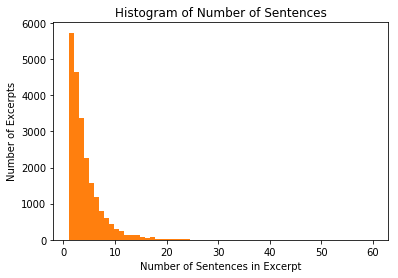

In [32]:
plt.hist(excerpt_lengths, bins=60)
plt.title("Histogram of Number of Sentences")
plt.xlabel("Number of Sentences in Excerpt")
plt.ylabel("Number of Excerpts")
plt.savefig('sentence_counts.png')
plt.show()

In [42]:
data_df['excerpt_lengths']=excerpt_lengths

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:2214: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ylabelsize=ylabelsize, yrot=yrot, **kwds)


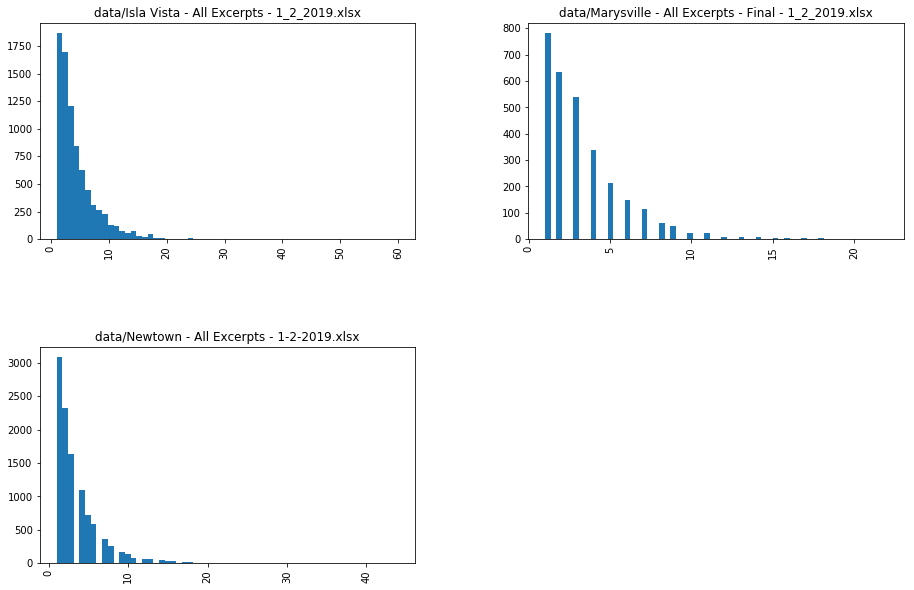

In [55]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
data_df['excerpt_lengths'].hist(by=data_df['file'], bins = 60, ax=ax)
plt.show()

In [89]:
sentence_counts_df = pd.DataFrame(data_df.excerpt_lengths.value_counts())
sentence_counts_df.columns = ['Number of Excerpts']
sentence_counts_df.index.name = 'Number of Sentences in Excerpt'
sentence_counts_df.sort_index()

,Number of Excerpts
Number of Sentences in Excerpt,
1,5730
2,4650
3,3384
4,2273
5,1564
6,1180
7,785
8,591
9,448


### Analysis by Article

In [90]:
data_df.groupby('file').excerpt_lengths.describe()

,count,mean,std,min,25%,50%,75%,max
file,,,,,,,,
data/Isla Vista - All Excerpts - 1_2_2019.xlsx,8127.0,4.106189,3.876340,1.0,2.0,3.0,5.0,60.0
data/Marysville - All Excerpts - Final - 1_2_2019.xlsx,2978.0,3.345198,2.666752,1.0,1.0,3.0,4.0,22.0
data/Newtown - All Excerpts - 1-2-2019.xlsx,10767.0,3.480821,3.190377,1.0,1.0,2.0,4.0,44.0


## Analysis of Single Sentence Excerpts

From these results we can see that most of the excerpts have only one sentence. This is good news, and if needed, this dataset of one sentence labels could be used to train a classifier, or use it as the test set to test the classifier on single sentences. 

In [94]:
# extract and save a df of single sentences
single_sents = [num_sent ==1  for num_sent in excerpt_lengths]
single_sent_ids = list(compress(data_df.index, single_sents))
single_sents_df = data_df.iloc[single_sent_ids, :]

In [95]:
# make sure there is a decent class distribution
print(single_sents_df['ACCOUNT'].value_counts())
# check if there is some representation from each file
print(single_sents_df['file'].value_counts())

0    5284
1     446
Name: ACCOUNT, dtype: int64
data/Newtown - All Excerpts - 1-2-2019.xlsx               3085
data/Isla Vista - All Excerpts - 1_2_2019.xlsx            1864
data/Marysville - All Excerpts - Final - 1_2_2019.xlsx     781
Name: file, dtype: int64


In [96]:
# save the sentences data frame to csv for further use
single_sents_df.to_csv("data/single_sents_df.csv")

## Analysis of Long Excerpts

There are several exceedingly long excerpts of over 25 sentences. This may be due to errors in the sentence tokenization, and so will be inspected manually. There are only about 20 total excerpts that are quite long, so it will not be too difficult to inspect them and decide if there are errors or if they should be kept in the dataset as is. 

In [98]:
# extract and save a df of single sentences
long_excerpts = [num_sent > 25  for num_sent in excerpt_lengths]
long_excerpt_ids = list(compress(data_df.index, long_excerpts))
long_excerpt_df = data_df.iloc[long_excerpt_ids, :]

In [99]:
# check the labels )it would be a good idea to remove non-account documents that are too long)
print(long_excerpt_df['ACCOUNT'].value_counts())
# check if there is some representation from each file
print(long_excerpt_df['file'].value_counts())

0    32
1     5
Name: ACCOUNT, dtype: int64
data/Isla Vista - All Excerpts - 1_2_2019.xlsx    19
data/Newtown - All Excerpts - 1-2-2019.xlsx       18
Name: file, dtype: int64


In [105]:
long_excerpt_df.groupby('ACCOUNT').describe()

excerpt_lengths                                                   
                  count      mean        std   min   25%   50%   75%   max
ACCOUNT                                                                   
0                  32.0  32.09375   6.060764  26.0  28.0  30.5  35.0  48.0
1                   5.0  38.80000  14.549914  27.0  29.0  30.0  48.0  60.0

In [106]:
for excerpt in long_excerpt_df.loc[long_excerpt_df['ACCOUNT'] == 1].Excerpts:
    print("********************************************")
    print(excerpt)
    print("********************************************")

********************************************
Elliot Rodger here.

This is my last video . It all has to come to this. Tomorrow is the day of
retribution; the day in which I will have my revenge against humanity. Against
all of you.

For the last eight years of my life , ever since I hit puberty, I have been
forced to endure an existence of loneliness, rejection and unfulfilled desires.
All because girls have never been attracted to me. Girls gave their affection
and sex and love to other men but never to me. I am 22, and I am still a virgin.
I have never even kissed a girl. I have been through college for 21 / 2 years,
more than that actually, and I am still a virgin. It has been very torturous. .
. .

College is the time when everyone experiences those things such as sex and fun
and pleasure. In those years, I have had to rot in loneliness. It is not fair.
You girls have never been attracted to me. I don't know why you girls aren't
attracted me. But I will punish you all for it. It is

It seems like these passages are way to long to be of use in training for sentence classification. Breaking passages this long up into sentences to use for training would add a lot of noise to the training data, and this would be better to avoid. Given the data set is quite large, with thousands of existing excerpts, removing only around 40 will not hurt the training, and given that these particular excerpts would be contributing quite a lot of noise, it would be best to remove them. 

Given this result, the charts were inspected again, to consider removing even more excerpts that are too long. Since 75% of the data has excerpts of less than 5 sentences, if there is enough accountability labels present in this subset of the dataset, it might be best to restrict the new dataset for training sentence classifiers to only use the excerpts with less than 5 sentences.

In [107]:
long_excerpts = [num_sent > 5  for num_sent in excerpt_lengths]
long_excerpt_ids = list(compress(data_df.index, long_excerpts))
long_excerpt_df = data_df.iloc[long_excerpt_ids, :]

In [108]:
# check the labels )it would be a good idea to remove non-account documents that are too long)
print(long_excerpt_df['ACCOUNT'].value_counts())
# check if there is some representation from each file
print(long_excerpt_df['file'].value_counts())

0    3468
1     803
Name: ACCOUNT, dtype: int64
data/Newtown - All Excerpts - 1-2-2019.xlsx               1908
data/Isla Vista - All Excerpts - 1_2_2019.xlsx            1891
data/Marysville - All Excerpts - Final - 1_2_2019.xlsx     472
Name: file, dtype: int64


In [109]:
long_excerpt_df.groupby('ACCOUNT').describe()

excerpt_lengths                                              
                  count      mean      std  min  25%  50%   75%   max
ACCOUNT                                                              
0                3468.0  9.051038  4.07154  6.0  6.0  8.0  10.0  48.0
1                 803.0  9.125778  4.31842  6.0  6.5  8.0  10.0  60.0

In [118]:
### save the sentences_df containing only excerpts with less than 5 sentences
short_excerpts_df = sentences_df.loc[sentences_df['excerpt_length']<5]
short_excerpts_df.shape
short_excerpts_df.groupby(['file', 'ACCOUNT', 'excerpt_length']).count()

Sentences  \
file                                               ACCOUNT excerpt_length              
data/Isla Vista - All Excerpts - 1_2_2019.xlsx     0       1                    1638   
                                                           2                    2740   
                                                           3                    2655   
                                                           4                    2524   
                                                   1       1                     226   
                                                           2                     646   
                                                           3                     969   
                                                           4                     840   
data/Marysville - All Excerpts - Final - 1_2_20... 0       1                     743   
                                                           2                    1170   
                                                           3                    1386   
                                                           4                    1172   
                                                   1       1                      38   
                                                           2                     102   
                                                           3                     231   
                                                           4                     176   
data/Newtown - All Excerpts - 1-2-2019.xlsx        0       1                    2903   
                                                           2                    4260   
                                                           3                    4473   
                                                           4                    3976   
                                                   1       1                     182   
                                                           2                     382   
                                                           3                     438   
                                                           4                     404   

                                                                           StoryID  
file                                               ACCOUNT excerpt_length           
data/Isla Vista - All Excerpts - 1_2_2019.xlsx     0       1                  1638  
                                                           2                  2740  
                                                           3                  2655  
                                                           4                  2524  
                                                   1       1                   226  
                                                           2                   646  
                                                           3                   969  
                                                           4                   840  
data/Marysville - All Excerpts - Final - 1_2_20... 0       1                   743  
                                                           2                  1170  
                                                           3                  1386  
                                                           4                  1172  
                                                   1       1                    38  
                                                           2                   102  
                                                           3                   231  
                                                           4                   176  
data/Newtown - All Excerpts - 1-2-2019.xlsx        0       1                  2903  
                                                           2                  4260  
                                                           3                  4473  
 

In [120]:
short_excerpts_df.to_csv("data/short_excerpts_df.csv")

These results show that many more non-accountability labels would be removed than accountability labels, so it seems this will not hurt the class imbalance too greatly if all these excerpts with length longer than 5 sentences are removed for training the sentence classifier. 

This new dataframe containing only sentences from excerpts of length less than 5 will be created and saved to csv for future use.

### Compare Class and File Balance in Short Sentences Only

In [119]:
short_excerpts_df.groupby(['file', 'ACCOUNT']).count()

Sentences  \
file                                               ACCOUNT              
data/Isla Vista - All Excerpts - 1_2_2019.xlsx     0             9557   
                                                   1             2681   
data/Marysville - All Excerpts - Final - 1_2_20... 0             4471   
                                                   1              547   
data/Newtown - All Excerpts - 1-2-2019.xlsx        0            15612   
                                                   1             1406   

                                                            StoryID  \
file                                               ACCOUNT            
data/Isla Vista - All Excerpts - 1_2_2019.xlsx     0           9557   
                                                   1           2681   
data/Marysville - All Excerpts - Final - 1_2_20... 0           4471   
                                                   1            547   
data/Newtown - All Excerpts - 1-2-2019.xlsx        0          15612   
                                                   1           1406   

                                                            excerpt_length  
file                                               ACCOUNT                  
data/Isla Vista - All Excerpts - 1_2_2019.xlsx     0                  9557  
                                                   1                  2681  
data/Marysville - All Excerpts - Final - 1_2_20... 0                  4471  
                                                   1                   547  
data/Newtown - All Excerpts - 1-2-2019.xlsx        0                 15612  
                                                   1                  1406

In [117]:
sentences_df.groupby(['file', 'ACCOUNT']).count()

Sentences  \
file                                               ACCOUNT              
data/Isla Vista - All Excerpts - 1_2_2019.xlsx     0            24695   
                                                   1             8676   
data/Marysville - All Excerpts - Final - 1_2_20... 0             8389   
                                                   1             1573   
data/Newtown - All Excerpts - 1-2-2019.xlsx        0            34400   
                                                   1             3078   

                                                            StoryID  \
file                                               ACCOUNT            
data/Isla Vista - All Excerpts - 1_2_2019.xlsx     0          24695   
                                                   1           8676   
data/Marysville - All Excerpts - Final - 1_2_20... 0           8389   
                                                   1           1573   
data/Newtown - All Excerpts - 1-2-2019.xlsx        0          34400   
                                                   1           3078   

                                                            excerpt_length  
file                                               ACCOUNT                  
data/Isla Vista - All Excerpts - 1_2_2019.xlsx     0                 24695  
                                                   1                  8676  
data/Marysville - All Excerpts - Final - 1_2_20... 0                  8389  
                                                   1                  1573  
data/Newtown - All Excerpts - 1-2-2019.xlsx        0                 34400  
                                                   1                  3078

## Using this Data for Sentence Classifier

One issue to consider, is that in using this transformation, additional noise is possible being introduced into the labels. For example, in an excerpt of four labels, it is possible that only one out of the four sentences actually makes a statement about accountability, that means there are three new sentences added to the training set that are incorrectly labelled. Incorrectly labelled training data is a problem known as "label noise". The specific type of label noise being introduced in this case is asymetric binary, random label noise, known as NAR label noise (noisy at random). The assumption made is that the noise introduced is independant of the features of the data, but not independant of the true class label. 

Only false postiive labels are being introduced, since all the sentences in an excerpt labelled as accountability are now being given the label accountability. It is a lot less likely there are many sentences in the excerpts that were labelled as not accountability, that should actually be labelled as accountability, resulting in the asymentric introduction of label noise being introduced. These considerations are important, since with correct assumptions about label noise introduced, label noise filters can be used.

Label noise in the test set could also be an issue, but luckily we have a dataset of single sentences of sufficient size, that this could be used to make up the test data.

To assess the overall possible amount of noise being introduced by this approach, lets assume each excerpt actually only contained one sentence about accountability. In this case, we can calculate how many sentences we now have in the short excerpts and full excerpts dataframes that are inccorectly labelled. 

In [149]:
sentences_account_df = sentences_df.loc[sentences_df['ACCOUNT']==1]
num_incorrect_full = 0
num_incorrect_short = 0
tot_full = 0
tot_short = 0

for index, row in sentences_account_df.iterrows():
    num_sents = row['excerpt_length']
    num_incorrect_full = num_incorrect_full + (num_sents -1) # assuming only one sentence is correct per excerpt
    tot_full = tot_full +num_sents
    if num_sents <5:
        num_incorrect_short = num_incorrect_short + (num_sents -1)
        tot_short = tot_short + num_sents

In [150]:
print("Percent incorrect sentences out of short excerpts sentences dataset: "+str(100*num_incorrect_short/tot_short))
print("Percent incorrect sentences out of full excerpts sentences dataset: "+str(100*num_incorrect_full/tot_full))

Percent incorrect sentences out of short excerpts sentences dataset: 65.15789473684211
Percent incorrect sentences out of full excerpts sentences dataset: 86.92854690794958


## Approaches to Use Excerpts to Train Sentence Classifier

There are two factors to consider in converting the existing labelled excerpts into labelled sentences. 

* How to train the classifier
* How to test the classifier

### How to Test

The ultimate objective in the end would be to use the classifier on an article sentence by sentence and identify which sentences are talking about accountability. To evaluate the performance of operating in this manner, the testing data used would have have to be passed in as single sentences. Therefore, it would be important to use a test set of only single sentences. The two approaches for this are:

* only evaluate with the excerpts that already exist as single sentences
* use the excerpts converted to labelled sentences

There are some issues with both of these approaches.

#### Evaluate on only single sentence excerpts

The main issue with this, is that the distribution of features may different in the single sentence excerpts than the rest of the data set. For example, the fact that these single sentences were able to fully capture a statement about accountability, indicate that perhaps they have some unigue sentence structure and terms that would not be present throughout the rest of the training data of excerpts that were more than one sentence. There are many issues that can arise from having a test set with a different distribution of features from the training set. 

If the data is trained as well only on single sentences, then this would likely lead to the best possible performance in this situation, since it is learning the features relevant to single sentences and evaluating based on sentences with those features as well. The main issue with this approach is that this greatly restricts the size of the dataset, and likely misses out on many examples of discussing accountability that is not present in these few excerpts. However the size of this data of single sentences alone, would actually be sufficient to train a simple classifier. 

#### Evaluate on sentences from multi-sentence excerpts

Another approach that would increase the size of the usable data, and also likely make the classifier able to generalize to more ways of discussing accountability, would be to evaluate based on the excerpts that were transformed into single labelled sentences. 

The main issue with this approach, is that it is possible this would be introducing too much label noise into the evaluation. The amount of label noise, could be as much as 65% of the labels from the short excerpts dataset, in which case the evaluation of results would have a high variance. The fact that the label noise introduced by this method is assymetric will also pose additional issues with the evaluation.  


### How to Train

The next issue to consider is how to train. This method is more straightforward to deal with, since it can be determined by experimentation, and the evaluation of the results with each approach can be used to determine which training method was most appropriate.

#### Using Only Single Sentence Excerpts

The issue with this method as mentioned before, is that the excerpts with onyl single sentences may contain unique features, and have a very different distribution of features from the rest of the dataset. Also the size of data available for training is reduced, however certain model will still be ok with this size of data.

#### Converting Excerpts into Labelled Sentences

The next approach, to convert more of the dataset into labelled sentences will increase the size of the data, but result in training in the presenve of label noise. Asymetric label noise can be tricky to deal with in training, however there are existing approaches such as noise filters and noise robust models that can be used to accommodate this.

#### Using Original Length Excerpts

Using the original full excerpts for training would reduce the amount of label noise, but once again it would have the issue of making the features and representation of the training set differ from the test set, which will likely hurt the performance. Instead of dealing with the noise in the labels, the noise will exist in the feature space, and dilute the representations to become less meaningful. A classifier trained on this may have issues applied to documents that have a significant difference in length and representation of features. 

## Proposed Approach

Based on this analysis the proposed approach to assess the options is as follows:

1) Evaluation with single sentence excerpts: use clear cut evaluation with minimal noise to evaluate training approaches
* train with singles sentences
* train with full excerpts
* train with excerpts converted to labelled sentences

2) Evaluation with excerpts converted to labelled single sentences: compare the same training methods as previous, this comparison will indicate the effectiveness of evaluating with the larger dataset.

3) Evaluate on full excerpts: this is the method that was used previously, and can be used to compare to the new sentence based approach to determine if there is a drop in performance.

The simplest, quickest and most trustworthy method is to use only the dataset of single sentences for both training and evaluation. This method should be used for testing and experimentation with models, and then the proposed approach for extending the included dataset will be tested on only the higher performing classification methods based on the results from single sentences. 